# Ch 5 - Support Vector Machines

This JN contains the code associated with Chapter 5 of the book. Please see the corresponding notes for more details.

## Linear SVM Classification

**Soft Margin Classification**

To implement an SVM model, we will use the Iris data set, do feature scaling(!), and create a pipeline to train the model.

All of this should be pretty fast for us, now that we have a lot of experience with creating ML models!!

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [5]:
iris = datasets.load_iris()

X = iris["data"][:, (2,3)] # Petal length and width, respectively
y = (iris["target"] == 2).astype(np.float64) # Only class w.r.t 'virginica'

In [9]:
scaler = StandardScaler()

svm_classifier = Pipeline([
    ("scaler", scaler),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

In [10]:
svm_classifier.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

We can visualize the decision boundary created by our SVM model:

In [19]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [67]:
C_hyperparameter=1

scaler = StandardScaler()
svm_clf1 = LinearSVC(C=C_hyperparameter, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf1.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [68]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 5.9, 0.8, 2.8)

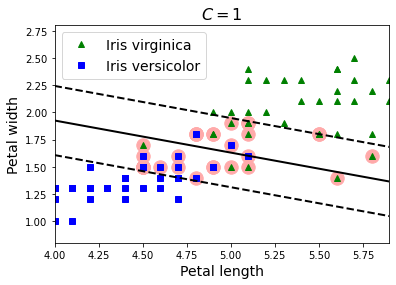

In [69]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

**Remarks**

(1) Another way to create an SVM model is to use SKL's 'SVC' class instead, and specify the 'kernal' hyperparameter to be "linear".

(2) You can also implement stochastic gradient descent when training and SVM model. You would simply instantiate an SGDClassifier class and specify the hyperparameter 'loss' to be "hinge", and 'alpha' to be "1/(m\*C))". It won't converge as fast as using 'LinearSVC' but it can be **useful when handling online classification tasks AND/OR when working with very large data sets (i.e. out-of-core training)**.

(3) Be sure to set the 'loss' hyperparameter to "hinge", as this is NOT the default!

(4) For better performance, you should set the 'dual' hyperparameter to "False" (unless there are more features than training instances; see later...)

## Non-Linear SVM Classification

To illustrate a non-linear SVM model, we will use SKL's "moons" data set. This is an artificial data set where the data points are vaguely shaped as semi-circles. The goal is to create a binary classifier for this data set.

In [70]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [81]:
help(make_moons)

Help on function make_moons in module sklearn.datasets._samples_generator:

make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)
    Make two interleaving half circles
    
    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or two-element tuple, optional (default=100)
        If int, the total number of points generated.
        If two-element tuple, number of points in each of two moons.
    
    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.
    
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossar

In [82]:
X, y= make_moons(n_samples=100, noise=0.15)

In [83]:
polynomial_svm_classifier = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_model", LinearSVC(C=10, loss="hinge"))
])

In [84]:
polynomial_svm_classifier.fit(X,y)

C:\Users\AJ\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_model', LinearSVC(C=10, loss='hinge'))])

We can visualize the SVM decision boundary:

In [87]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [88]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

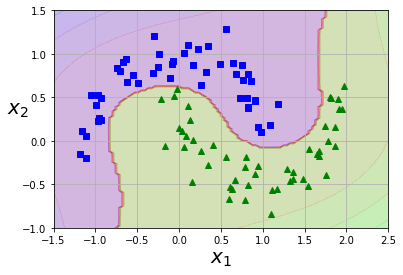

In [89]:
plot_predictions(polynomial_svm_classifier, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

Indeed, we see that the solid-red decision boundary is NOT linear! Yet, by using polynomial features, we were able to train an SVM model on this data as if it were linear.

**Polynomial Kernel**

We will create two models, one with degree 3 and another with degree 10, and will plot them to compare.

In [106]:
from sklearn.svm import SVC

deg = 3
poly_kernel_svm_classifier_deg3 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=deg, coef0=1, C=5))
])

In [107]:
poly_kernel_svm_classifier_deg3.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [108]:
deg = 10
poly_kernel_svm_classifier_deg10 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=deg, coef0=1, C=5))
])

In [109]:
poly_kernel_svm_classifier_deg10.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

Text(0, 0.5, '')

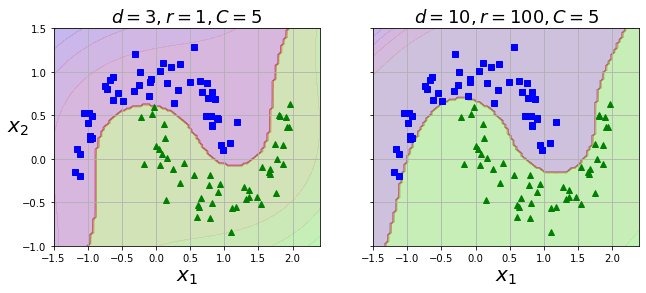

In [111]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_classifier_deg3, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly_kernel_svm_classifier_deg10, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

We can see that the degree-10 model is more strict as its decision boundary more greatly distinguished between the two classes.

**NOTE**: The hyperparameter 'coef0' controls how much the model is influenced by the higher-degree polynomial terms vs. the lower-degree ones.

**Similarity Features**

Here, we show a quick implementation of using the Gaussian RBF kernel when training an SVM model.

In [113]:
rbf_kernel_svm_classifier = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

In [114]:
rbf_kernel_svm_classifier.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

## SVM Regression

To illustrate the use of SVM for a regression task, we first make some artificial data, and then fit an SVM model to that data.

In [115]:
np.random.seed(42)

m = 50 # Number of instances

X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [116]:
from sklearn.svm import LinearSVR

svm_regression = LinearSVR(epsilon=1.5, random_state=42)
svm_regression.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

Here is a visualization of the decision boundary. Note that the majority of the training instances are **inside** the margins!

In [131]:
eps = 1

svm_reg1 = LinearSVR(epsilon=eps, random_state=42)
svm_reg1.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [132]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

Text(0.5, 1.0, '$\\epsilon = 1$')

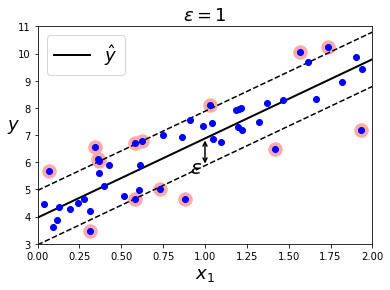

In [133]:
#fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
#plt.sca(axes[0])

plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
#plt.sca(axes[1])
#plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
#plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)

**Non-Linear SVM Regression**

In [134]:
np.random.seed(42)

m = 100 # Number of instances

X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [136]:
from sklearn.svm import SVR

svm_poly_regression = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_regression.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [139]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=1000, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.001, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.001, degree=2, kernel='poly')

Text(0.5, 1.0, '$degree=2, C=0.001, \\epsilon = 0.1$')

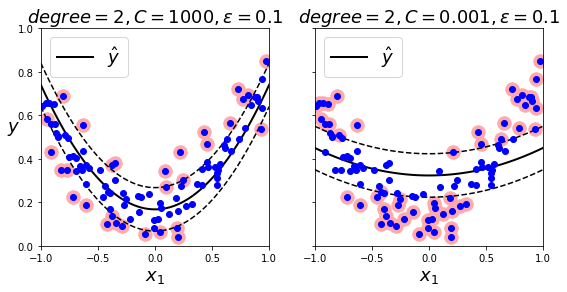

In [141]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
